In [1]:
# file_paths=['1991.nc','1992.nc','1993.nc','1994.nc','1995.nc','1996.nc', '1997.nc',
#             '1998.nc','1999.nc','2000.nc','2001.nc','2002.nc','2003.nc', '2004.nc',
#             '2005.nc','2006.nc','2007.nc','2008.nc','2009.nc','2010.nc', '2011.nc',
#             '2012.nc','2013.nc',
#             '2014.nc','2015.nc','2016.nc','2017.nc','2018.nc','2019.nc', '2020.nc']

In [2]:
# import xarray as xr
# datasets = [xr.open_dataset(file_path) for file_path in file_paths]
# datasets

In [3]:
import xarray as xr
NDVI_360months = xr.open_dataset('NDVI_30years.nc')
NDVI_360months = NDVI_360months.NDVI
NDVI_360months = NDVI_360months.drop('region')
NDVI_360months

<xarray.DataArray 'NDVI' (time: 360, latitude: 280, longitude: 260, region: 1)>
[26208000 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
  * time       (time) datetime64[ns] 1991-01-31 1991-02-28 ... 2020-12-31
Dimensions without coordinates: region
Attributes:
    long_name:      NOAA Climate Data Record of Normalized Difference Vegetat...
    units:          1
    valid_range:    [-1000 10000]
    grid_mapping:   crs
    standard_name:  normalized_difference_vegetation_index

In [4]:
max_value = NDVI_360months.max().compute()
# Print or use the maximum value
print("Maximum value:", max_value)

Maximum value: <xarray.DataArray 'NDVI' ()>
array(1.19059992)


In [5]:
min_value = NDVI_360months.min().compute()
# Print or use the maximum value
print("Minimum value:", min_value)

Minimum value: <xarray.DataArray 'NDVI' ()>
array(-2.27690005)


In [6]:
import geopandas as gpd
Cuenca = gpd.read_file('C:\\Users\\bleul\\Downloads\\Africa\\Cuenca shape\\Cuenca_Juba_Shabbe.shp')
mil = gpd.read_file('C:\\Users\\bleul\\Downloads\\Africa\\Curvas_shape\\ELEV_1000.shp')
tresmil = gpd.read_file('C:\\Users\\bleul\\Downloads\\Africa\\Curvas_shape\\ELEV_3000.shp')

In [7]:
# NDVI_360months = xr.concat(datasets, dim='time')

In [8]:
# pip install xarray regionmask geopandas

In [9]:

# import regionmask

# # Create a mask (array of resolution of ds but the ones inside the shapfile, using the shapefile)
# mask_cuenca = regionmask.mask_3D_geopandas(Cuenca, NDVI_360months, lon_name='longitude', lat_name='latitude')
# mask_cuenca
# NDVI_360months = NDVI_360months.where(mask_cuenca)
# NDVI_360months

In [10]:
# NDVI_360months.to_netcdf("NDVI_30years.nc")

### ____________________________ DISTRIBUCIÓN DE NANS

In [11]:
pe=NDVI_360months[0]
pe

<xarray.DataArray 'NDVI' (latitude: 280, longitude: 260, region: 1)>
array([[[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
    time       datetime64[ns] 1991-01-31
Dimensions without coordinates: region
Attributes:
    long_name:      NOAA Climate Data Record of Normalized Difference Vegetat...
    units:          1
    valid_range:    [-1000 10000]
    grid_mapping:   crs
    standard_name:  normalized_difference_vegetation_index

In [12]:
binary_array = xr.where(NDVI_360months.isnull(), 1, 0)
binary_array[12]

<xarray.DataArray 'NDVI' (latitude: 280, longitude: 260, region: 1)>
array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
...
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]])
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
    time       datetime64[ns] 1992-01-31
Dimensions without coordinates: region

In [13]:

import regionmask

# Create a mask (array of resolution of ds but the ones inside the shapfile, using the shapefile)
mask_cuenca = regionmask.mask_3D_geopandas(Cuenca, binary_array, lon_name='longitude', lat_name='latitude')
mask_cuenca
binary_array = binary_array.where(mask_cuenca)
binary_array

C:\Users\bleul\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\bleul\anaconda3\Lib\site-packages\regionmask\core\mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


<xarray.DataArray 'NDVI' (time: 360, latitude: 280, longitude: 260, region: 1)>
array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
...
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]]])
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
  * time       (time) datetime64[ns] 1991-01-31 1991-02-28 ... 2020-12-31
  * region     (region) int64 0

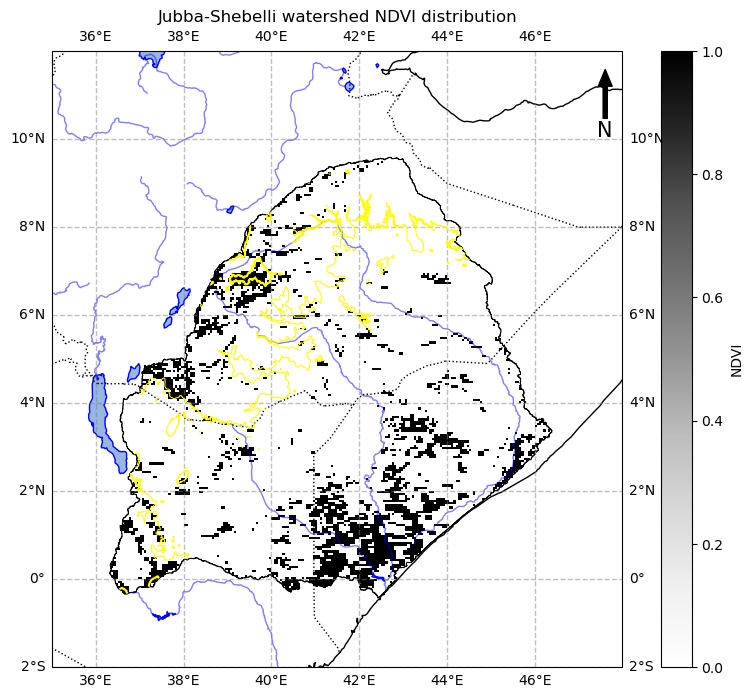

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
# Plot with Cartopy projection and add shapefile
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})



binary_array[12].plot(ax=ax,cmap='Greys')





ax.set_title('Jubba-Shebelli watershed NDVI distribution')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue',alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

x, y, arrow_length = 0.97, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
# Add shapefile to the plot

Cuenca.plot(ax=ax, color='none', edgecolor='black', linewidth=0.75)
mil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=0.75)
tresmil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=1.5)

# Show the plot
plt.show()

In [15]:
NAN_12months_clim = binary_array.groupby('time.month').sum(dim='time')
NAN_12months_clim

<xarray.DataArray 'NDVI' (month: 12, latitude: 280, longitude: 260, region: 1)>
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
...
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]])
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
  * region     (region) int64 0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [16]:

import regionmask

# Create a mask (array of resolution of ds but the ones inside the shapfile, using the shapefile)
mask_cuenca = regionmask.mask_3D_geopandas(Cuenca, NAN_12months_clim, lon_name='longitude', lat_name='latitude')
mask_cuenca
NAN_12months_clim = NAN_12months_clim.where(mask_cuenca)
NAN_12months_clim

C:\Users\bleul\anaconda3\Lib\site-packages\regionmask\core\mask.py:178: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


<xarray.DataArray 'NDVI' (month: 12, latitude: 280, longitude: 260, region: 1)>
array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
...
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]]])
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
  * region     (region) int64 0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

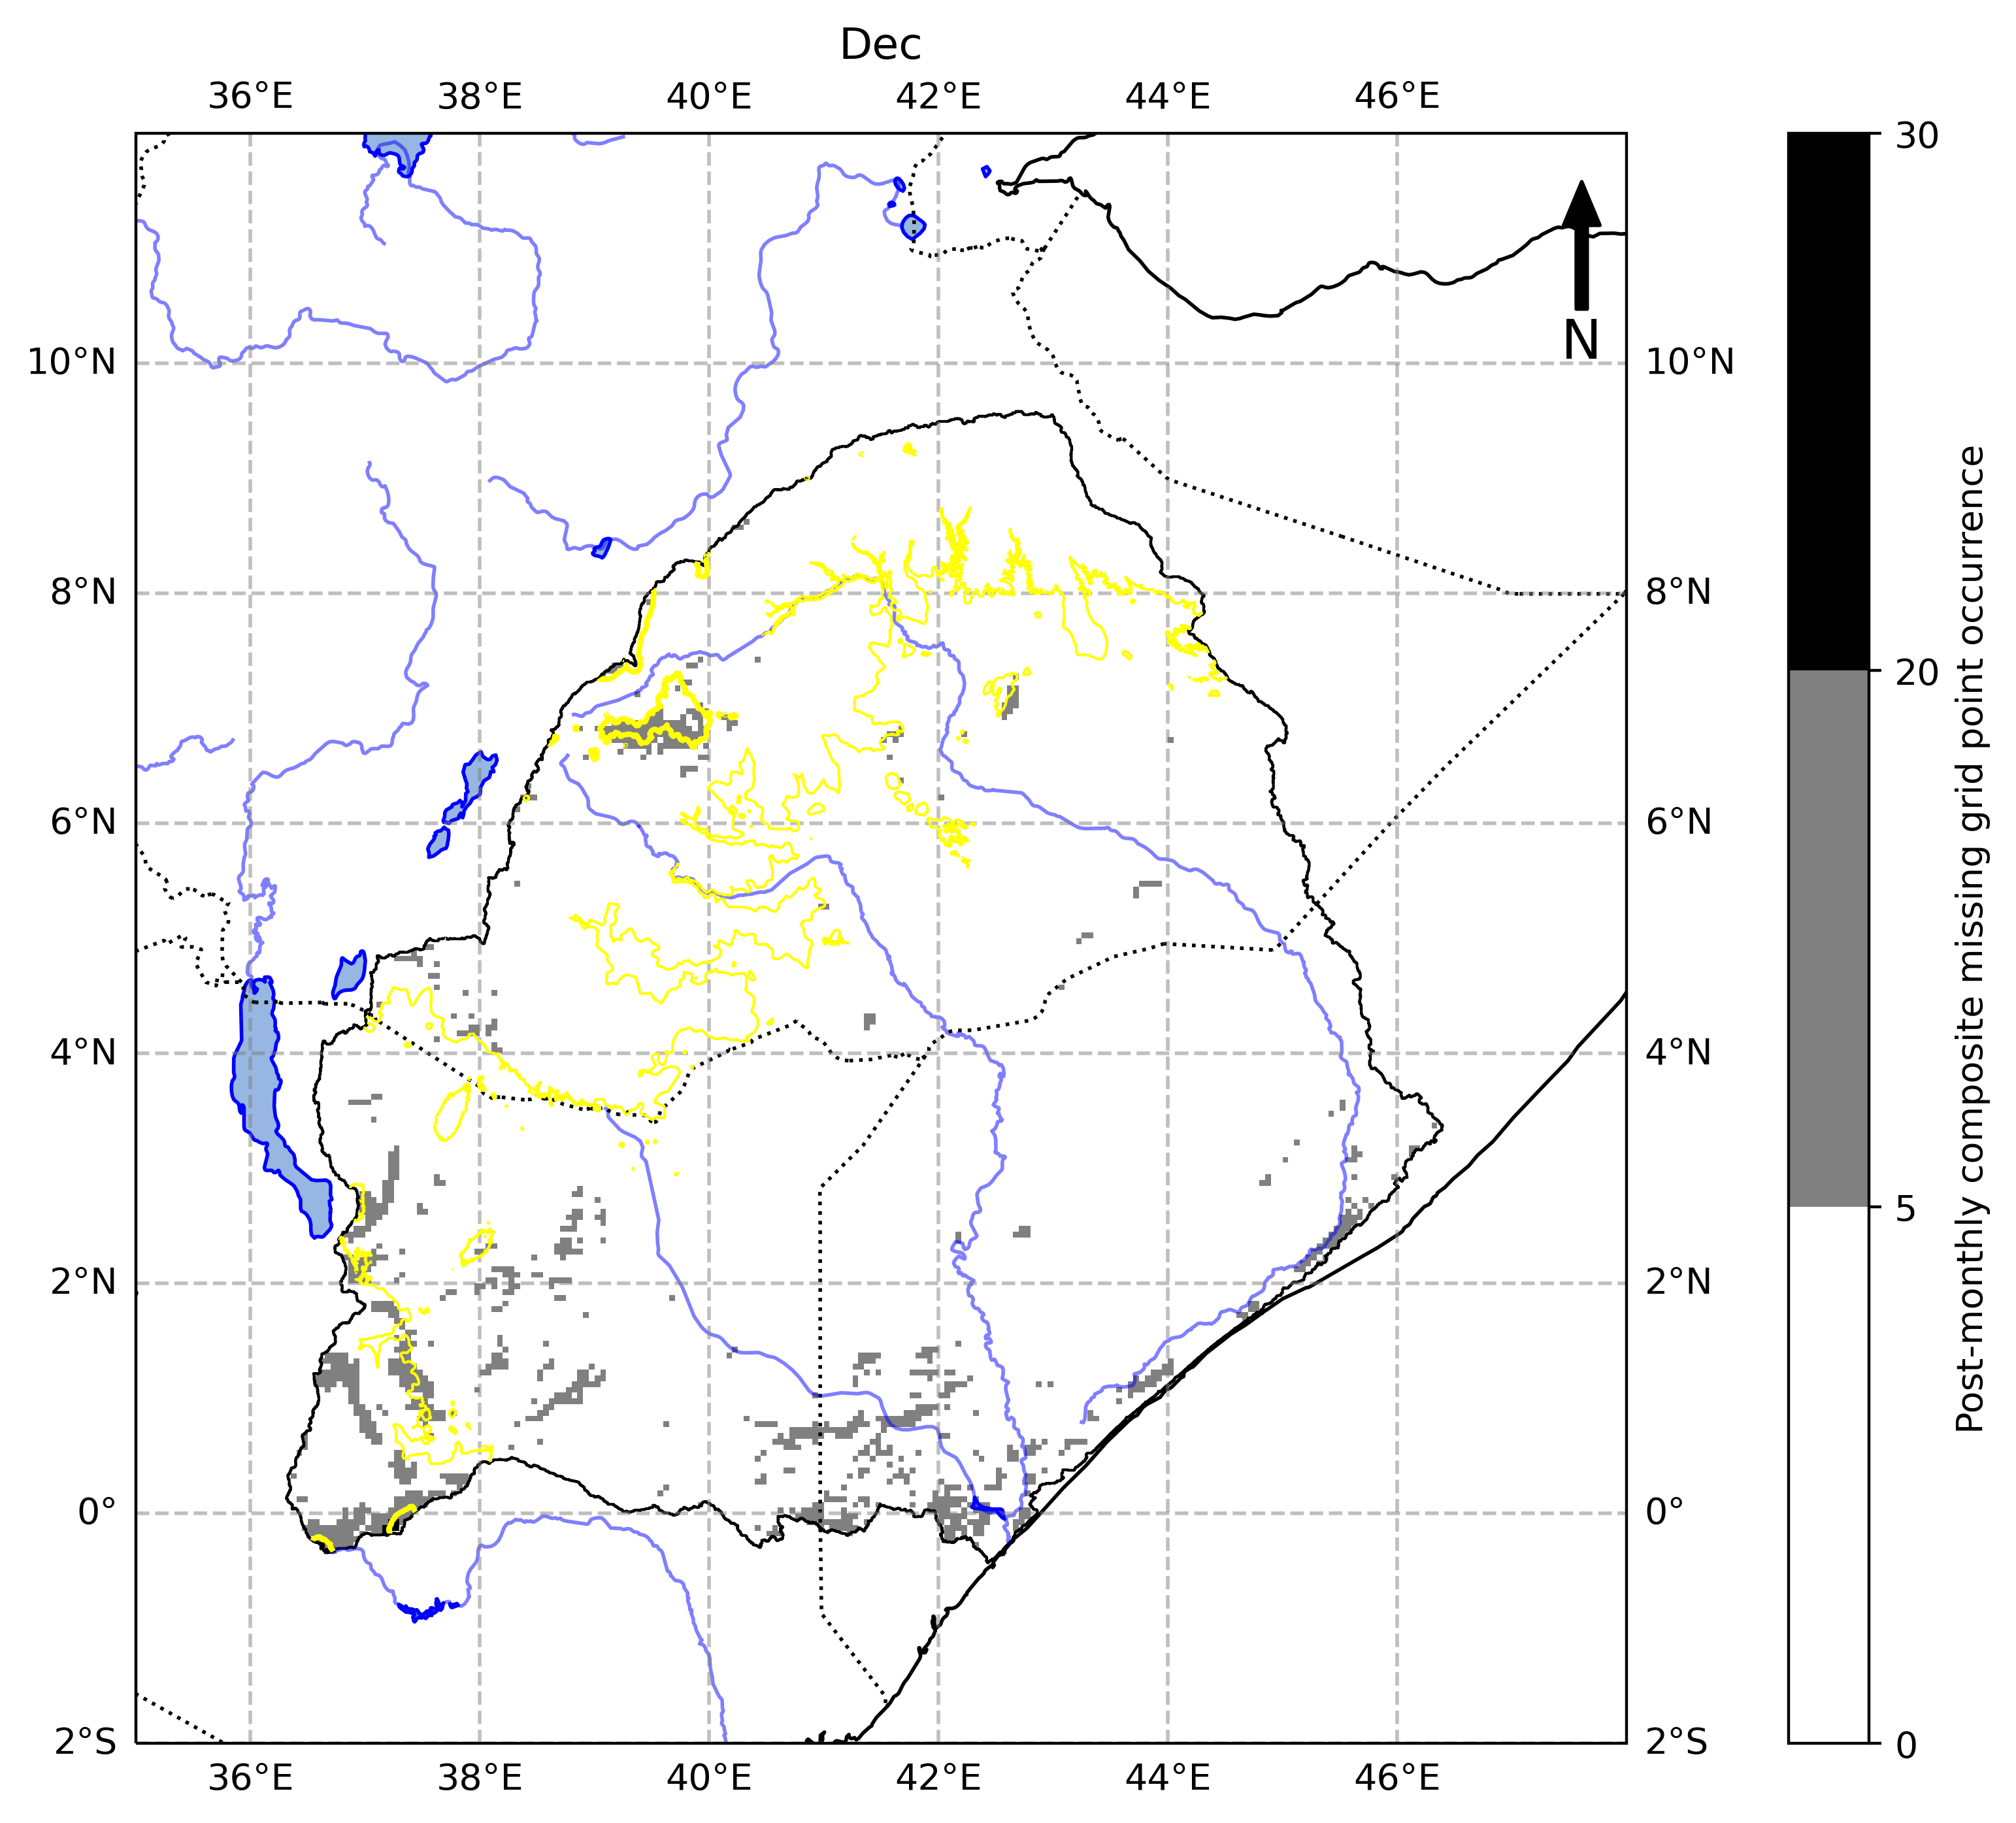

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
# Plot with Cartopy projection and add shapefile
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()},dpi=400)


colors = [ 'white','grey', 'black']  # Add more colors as needed
cmap = mcolors.ListedColormap(colors)

NAN_12months_clim[11].plot(ax=ax,levels=[0,5,20,30],cmap=cmap, cbar_kwargs={'pad': 0.08, 'fraction': 0.05, 
                                                                            'label': 'Post-monthly composite missing grid point occurrence',
                                                                           'orientation': 'vertical','location': 'right'})





ax.set_title('Dec')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue',alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

x, y, arrow_length = 0.97, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
# Add shapefile to the plot

Cuenca.plot(ax=ax, color='none', edgecolor='black', linewidth=0.75)
mil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=0.75)
tresmil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=1.5)
# Save the plot as a PNG file
plt.savefig('July.png')
# Show the plot
plt.show()



## ________________________________________ MONTHLY MEANS

In [18]:
NDVI_12months_clim = NDVI_360months.groupby('time.month').median(dim='time')
NDVI_12months_clim

<xarray.DataArray 'NDVI' (month: 12, latitude: 280, longitude: 260, region: 1)>
array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
...
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: region
Attributes:
    long_name:      NOAA Climate Data Record of Normalized Difference Vegetat...
    units:          1
    valid_range:    [-1000 10000]
    grid_mapping:   crs
    standard_name:  normalized_difference_vegetation_index

In [19]:
max_value = NDVI_12months_clim.max().compute()
# Print or use the maximum value
print("Maximum value:", max_value)

Maximum value: <xarray.DataArray 'NDVI' ()>
array(0.87720001)


In [20]:
min_value = NDVI_12months_clim.min().compute()
# Print or use the maximum value
print("Minimum value:", min_value)

Minimum value: <xarray.DataArray 'NDVI' ()>
array(-0.0309)


In [21]:
# NDVI_12months_clim=NDVI_360months.resample(time="Month").median()
# NDVI_12months_clim

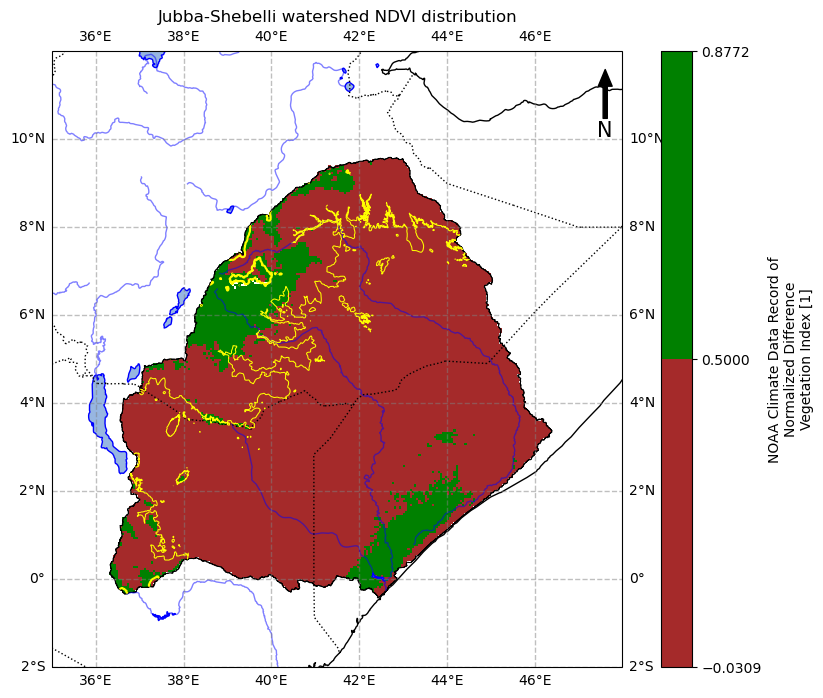

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
# Plot with Cartopy projection and add shapefile
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})


# Define your custom colormap
colors = ['brown', 'yellow', 'green']  # Add more colors as needed
cmap = mcolors.ListedColormap(colors)

NDVI_12months_clim[5].plot(ax=ax, levels = [min_value, 0.5, max_value],cmap=cmap)





ax.set_title('Jubba-Shebelli watershed NDVI distribution')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue',alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

x, y, arrow_length = 0.97, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
# Add shapefile to the plot

Cuenca.plot(ax=ax, color='none', edgecolor='black', linewidth=0.75)
mil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=0.75)
tresmil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=1.5)

# Show the plot
plt.show()

## _________________________________________________ CLIMATOLOGY

In [23]:
NDVI_total=NDVI_12months_clim.median(dim='month')
NDVI_total

<xarray.DataArray 'NDVI' (latitude: 280, longitude: 260, region: 1)>
array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
...
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 11.97 11.92 11.88 ... -1.875 -1.925 -1.975
  * longitude  (longitude) float32 35.02 35.07 35.12 35.18 ... 47.88 47.93 47.97
Dimensions without coordinates: region

In [24]:
median_value = NDVI_total.median().compute()
# Print or use the maximum value
print("Median value:", median_value)

Median value: <xarray.DataArray 'NDVI' ()>
array(0.26554999)


In [25]:
max_value = NDVI_total.max().compute()
# Print or use the maximum value
print("Maximum value:", max_value)

Maximum value: <xarray.DataArray 'NDVI' ()>
array(0.76917499)


In [26]:
min_value = NDVI_total.min().compute()
# Print or use the maximum value
print("Minimum value:", min_value)

Minimum value: <xarray.DataArray 'NDVI' ()>
array(0.04925)


In [27]:
total_pixels = NDVI_total.count().item()
total_pixels

25975

In [28]:
#pip install earthpy

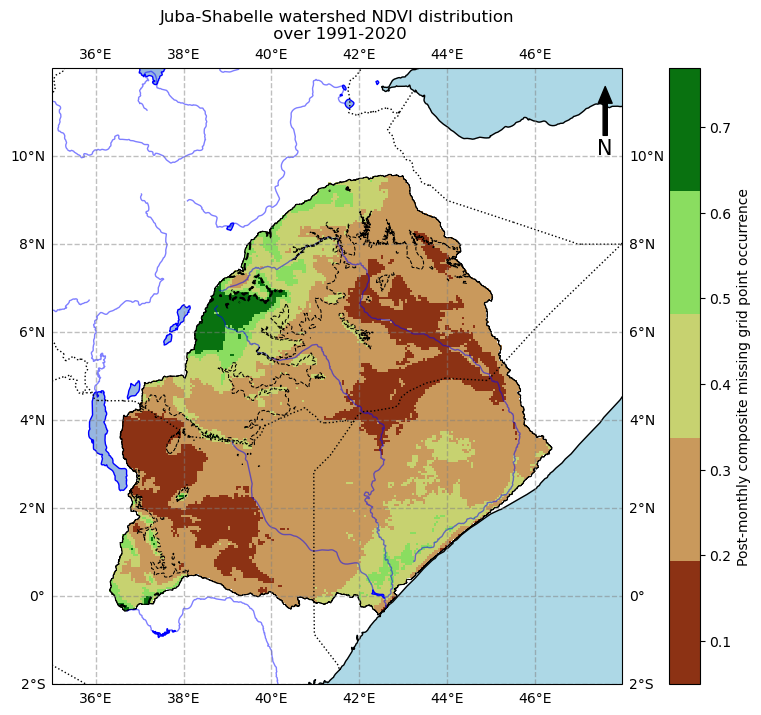

In [29]:
# Plot with Cartopy projection and add shapefile
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})



# Define your custom colormap
colors = [ '#8C3214','#c9995c','#c7d270', '#8add60', '#097210']  # Add more colors as needed
cmap = mcolors.ListedColormap(colors)

NDVI_total.plot(ax=ax,vmin=min_value, vmax=max_value,cmap=cmap, cbar_kwargs={'pad': 0.06, 'fraction': 0.05, 
                                                                            'label': 'Post-monthly composite missing grid point occurrence',
                                                                           'orientation': 'vertical','location': 'right'})

# levels = [min_value, 0.25, 0.5, max_value]
# vmin=min_value, vmax=max_value

ax.set_title('Juba-Shabelle watershed NDVI distribution\n over 1991-2020')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue',alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Fill the ocean with light blue color
ax.add_feature(cfeature.OCEAN, color='lightblue')



x, y, arrow_length = 0.97, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
# Add shapefile to the plot









import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et


Cuenca.plot(ax=ax, color='none', edgecolor='black', linewidth=0.75,legend=True)
mil.plot(ax=ax, color='black', edgecolor='yellow', linewidth=0.75,linestyle='--',legend=True)
tresmil.plot(ax=ax, color='black', edgecolor='yellow', linewidth=1.5,linestyle='--',legend=True)


# # Get the legend handles and labels
# handles, labels = ax.get_legend_handles_labels()

# # Add legend
# ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 0.5))



# # Add legend
# leg = ax.get_legend()


# # Adjust legend location
# #leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.15,0.5))
#ax.set_axis_off()



# # Add legend
# legend = plt.legend(handles=legend_patches, title='Legend', loc='upper right')
# ax.add_artist(leg)




# Save the plot as a PNG file
plt.savefig('NDVI_30.png')

# Show the plot
plt.show()


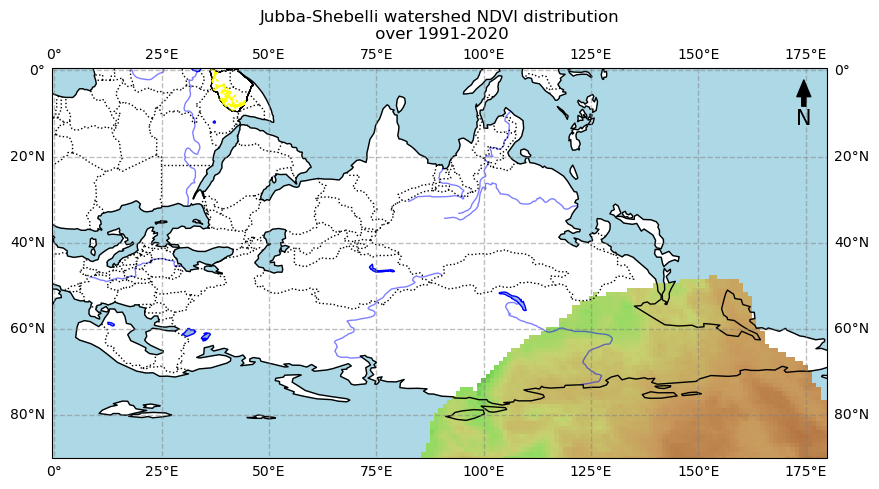

In [30]:
# Plot with Cartopy projection and add shapefile
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})



# Define your custom colormap
colors = [ '#8C3214','#c9995c','#c7d270', '#8add60', '#097210']  # Add more colors as needed
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', ['#8C3214','#c9995c','#c7d270', '#8add60', '#097210'], N=256)
im = ax.imshow(NDVI_total, vmin=min_value, vmax=max_value, cmap=cmap, interpolation='nearest', origin='upper')
#NDVI_total.plot(ax=ax,vmin=min_value, vmax=max_value,cmap=cmap)

# levels = [min_value, 0.25, 0.5, max_value]
# vmin=min_value, vmax=max_value

ax.set_title('Jubba-Shebelli watershed NDVI distribution\n over 1991-2020')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.LAKES, edgecolor='blue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue',alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Fill the ocean with light blue color
ax.add_feature(cfeature.OCEAN, color='lightblue')



x, y, arrow_length = 0.97, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
# Add shapefile to the plot

Cuenca.plot(ax=ax, color='none', edgecolor='black', linewidth=0.75)
mil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=0.75)
tresmil.plot(ax=ax, color='yellow', edgecolor='yellow', linewidth=1.5)

# Show the plot
plt.show()

## _______________________________ ZONAL STATISTICS

In [31]:
ZS=NDVI_360months.median(dim=['latitude','longitude'])
ZS

<xarray.DataArray 'NDVI' (time: 360, region: 1)>
array([[0.24485   ],
       [0.2164    ],
       [0.22424999],
       [0.3004    ],
       [0.3367    ],
       [0.23799999],
       [0.1619    ],
       [0.1417    ],
       [0.16255   ],
       [0.1589    ],
       [0.1739    ],
       [0.2188    ],
       [0.1936    ],
       [0.1758    ],
       [0.1897    ],
       [0.2333    ],
       [0.2758    ],
       [0.24864998],
       [0.1766    ],
       [0.1582    ],
...
       [0.37159997],
       [0.32349998],
       [0.2819    ],
       [0.259     ],
       [0.2511    ],
       [0.4416    ],
       [0.54875   ],
       [0.54845   ],
       [0.40835   ],
       [0.33305   ],
       [0.2881    ],
       [0.38819999],
       [0.52489996],
       [0.3784    ],
       [0.3218    ],
       [0.29455   ],
       [0.2904    ],
       [0.3224    ],
       [0.4597    ],
       [0.3627    ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-31 1991-02-28 ... 2020-12-31
Dimensions without coordinates: region

In [32]:
median_value = ZS.median().compute()
# Print or use the maximum value
print("Maximum value:", median_value)

Maximum value: <xarray.DataArray 'NDVI' ()>
array(0.26019999)


In [33]:
max_value = ZS.max().compute()
# Print or use the maximum value
print("Maximum value:", max_value)

Maximum value: <xarray.DataArray 'NDVI' ()>
array(0.54874998)


In [34]:
min_value = ZS.min().compute()
# Print or use the maximum value
print("Minimum value:", min_value)

Minimum value: <xarray.DataArray 'NDVI' ()>
array(0.1417)


In [35]:
df = ZS.to_dataframe()
df

NDVI
time       region         
1991-01-31 0       0.24485
1991-02-28 0       0.21640
1991-03-31 0       0.22425
1991-04-30 0       0.30040
1991-05-31 0       0.33670
...                    ...
2020-08-31 0       0.29455
2020-09-30 0       0.29040
2020-10-31 0       0.32240
2020-11-30 0       0.45970
2020-12-31 0       0.36270

[360 rows x 1 columns]

In [36]:

df = df.reset_index(level='region', drop=True)
df['pixels'] = None
# Assuming your DataFrame is named 'df'
df = df.rename_axis('date')
df

NDVI pixels
date                      
1991-01-31  0.24485   None
1991-02-28  0.21640   None
1991-03-31  0.22425   None
1991-04-30  0.30040   None
1991-05-31  0.33670   None
...             ...    ...
2020-08-31  0.29455   None
2020-09-30  0.29040   None
2020-10-31  0.32240   None
2020-11-30  0.45970   None
2020-12-31  0.36270   None

[360 rows x 2 columns]

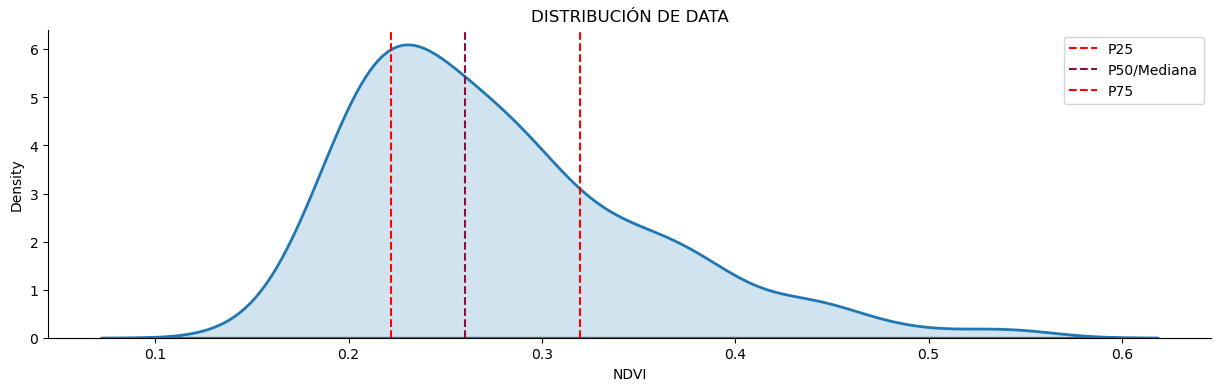

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.subplots(figsize=(15,4))
plt.title('DISTRIBUCIÓN DE DATA')

sns.despine()
sns.kdeplot(
   data=df['NDVI'], linewidth=2,
   fill=True, alpha=.2,
   common_norm=False
)




plt.axvline(x=df['NDVI'].quantile(0.25), color='red', linestyle='--', label='P25')
plt.axvline(x=df['NDVI'].quantile(0.5), color='#900C3F', linestyle='--', label='P50/Mediana')
plt.axvline(x=df['NDVI'].quantile(0.75), color='red', linestyle='--', label='P75')


# Show the plot
plt.legend()  # Add a legend to label the vertical line





#plt.show()

In [38]:
df.index[2]


Timestamp('1991-03-31 00:00:00')

In [39]:
df.loc[df.index[-1],'NDVI']

0.3627

In [40]:
for n in range(0,360):
    non_nan_count = ((25975 -(NDVI_360months[n].count().item()))/25975)*100
    df.loc[df.index[n], 'pixels'] = non_nan_count


In [41]:
import pandas as pd
df['pixels'] = pd.to_numeric(df['pixels'], errors='coerce')


In [42]:
df

NDVI     pixels
date                          
1991-01-31  0.24485   0.696824
1991-02-28  0.21640   0.115496
1991-03-31  0.22425   1.216554
1991-04-30  0.30040   7.684312
1991-05-31  0.33670  24.188643
...             ...        ...
2020-08-31  0.29455  12.284889
2020-09-30  0.29040   3.869105
2020-10-31  0.32240   5.666987
2020-11-30  0.45970   1.447546
2020-12-31  0.36270   0.019249

[360 rows x 2 columns]

In [43]:
df = df.reset_index()

# Display the modified DataFrame
df

date     NDVI     pixels
0   1991-01-31  0.24485   0.696824
1   1991-02-28  0.21640   0.115496
2   1991-03-31  0.22425   1.216554
3   1991-04-30  0.30040   7.684312
4   1991-05-31  0.33670  24.188643
..         ...      ...        ...
355 2020-08-31  0.29455  12.284889
356 2020-09-30  0.29040   3.869105
357 2020-10-31  0.32240   5.666987
358 2020-11-30  0.45970   1.447546
359 2020-12-31  0.36270   0.019249

[360 rows x 3 columns]

In [44]:
df.dtypes

date      datetime64[ns]
NDVI             float32
pixels           float64
dtype: object

In [45]:
import pandas as pd
df['date'] = df['date'].dt.to_period('M').astype(str) + '-01'
df['date'] = pd.to_datetime(df['date'])

df

date     NDVI     pixels
0   1991-01-01  0.24485   0.696824
1   1991-02-01  0.21640   0.115496
2   1991-03-01  0.22425   1.216554
3   1991-04-01  0.30040   7.684312
4   1991-05-01  0.33670  24.188643
..         ...      ...        ...
355 2020-08-01  0.29455  12.284889
356 2020-09-01  0.29040   3.869105
357 2020-10-01  0.32240   5.666987
358 2020-11-01  0.45970   1.447546
359 2020-12-01  0.36270   0.019249

[360 rows x 3 columns]

In [46]:
df.dtypes

date      datetime64[ns]
NDVI             float32
pixels           float64
dtype: object

In [47]:
df.to_excel('mensual_py.xlsx')

In [48]:
df['date'][12]

Timestamp('1992-01-01 00:00:00')

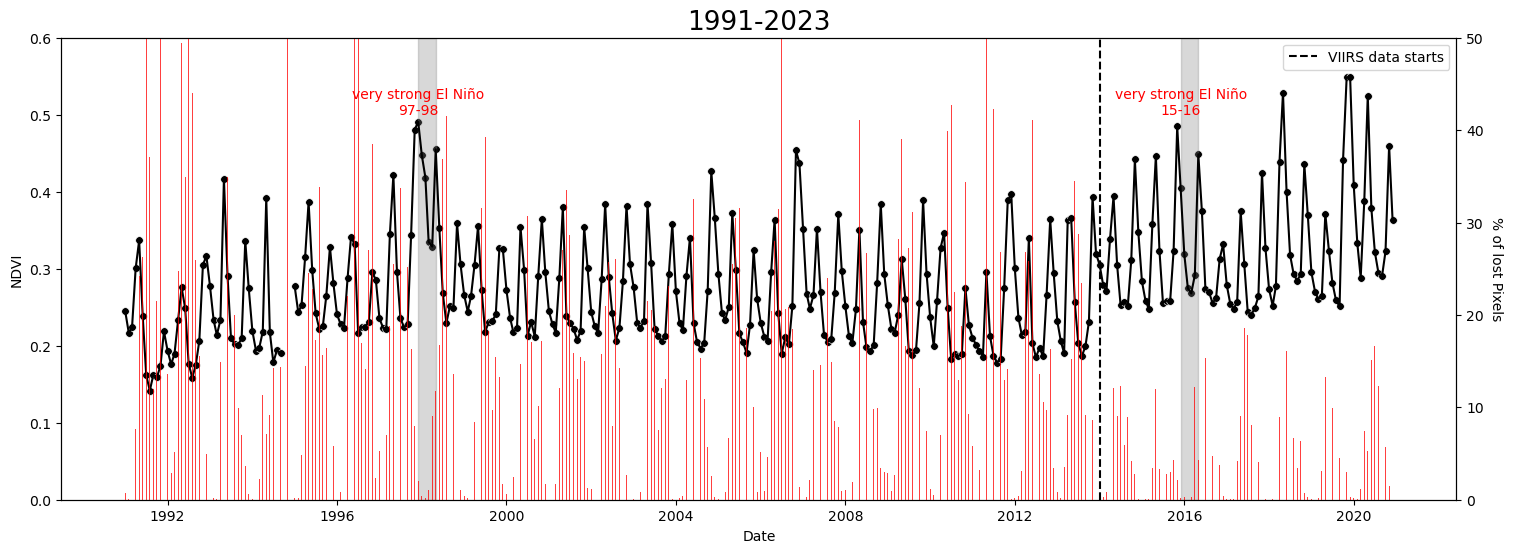

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the time series on the left axis
ax1.plot(df['date'][0:360], df['NDVI'][0:360], color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI')
#ax1.tick_params('y', colors='blue')
min_ndvi = 0
max_ndvi = 0.6
ax1.set_ylim(min_ndvi, max_ndvi)


sns.scatterplot(
        x=df['date'][0:360],
        y=df['NDVI'][0:360],
        ax=ax1,
        color= 'black' ,
        s=30  # Adjust the size of the points as needed
    )

# Highlight the three continuous months
start_date = pd.to_datetime('1997-12-01')
end_date = start_date + pd.DateOffset(months=5)

plt.axvspan(start_date, end_date, color='gray', alpha=0.3)

start_date_2 = pd.to_datetime('2015-12-01')
end_date_2 = start_date_2 + pd.DateOffset(months=5)

plt.axvspan(start_date_2, end_date_2, color='gray', alpha=0.3)


ax1.axvline(x=df['date'][276], linestyle='--', color='black', label='VIIRS data starts')

# Display the legend
ax1.legend()



# Create a second y-axis on the right side for the bar plot
ax2 = ax1.twinx()
ax2.bar(df['date'][0:360], df['pixels'][0:360], color='red', alpha=0.75, label='Pixels',width=7)
ax2.set_ylabel('% of lost Pixels',  rotation=270, va='bottom')
ax2.tick_params('y')
#ax2.axhline(y=19486, linestyle='--', color='red', label='75% of total pixels')
min_nan = 0
max_nan = 50
ax2.set_ylim(min_nan, max_nan)

# Add text above the curve at specific points
plt.text(pd.to_datetime('1997-12-01'), 43, 'very strong El Niño\n97-98', color='red', ha='center', va='center')
plt.text(pd.to_datetime('2015-12-01'), 43, 'very strong El Niño\n15-16', color='red', ha='center', va='center')




# Set a common title
plt.title('1991-2023', fontsize=19)

# # Display the legend
# fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
# Save the plot as a PNG file
plt.savefig('1991-2023.png')

# Show the plot
plt.show()


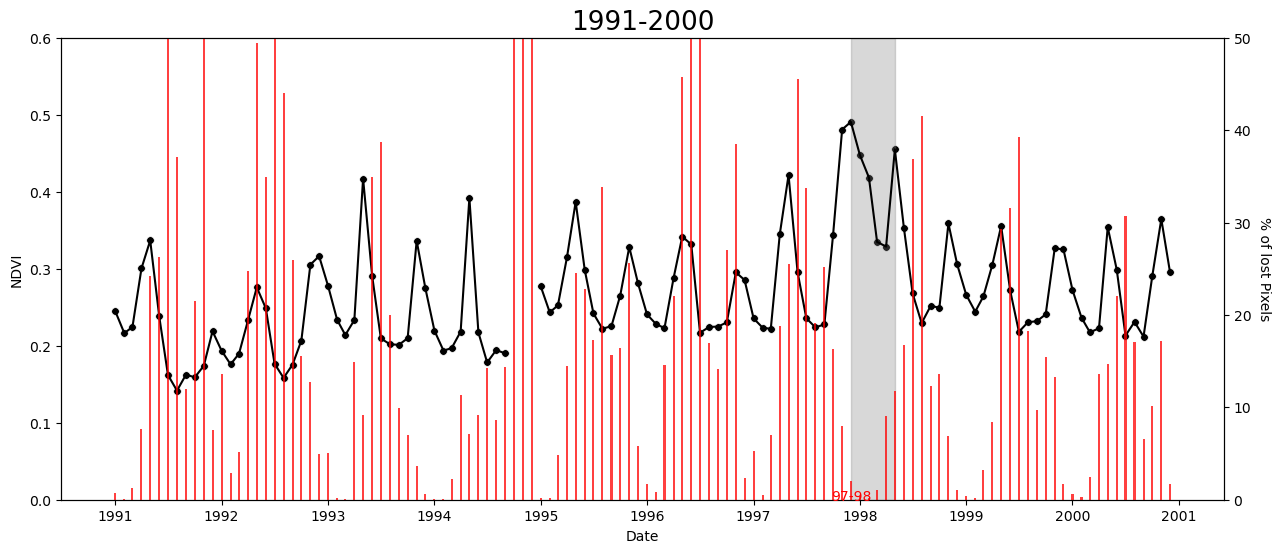

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the time series on the left axis
ax1.plot(df['date'][0:120], df['NDVI'][0:120], color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI')
#ax1.tick_params('y', colors='blue')
min_ndvi = 0
max_ndvi = 0.6
ax1.set_ylim(min_ndvi, max_ndvi)


sns.scatterplot(
        x=df['date'][0:120],
        y=df['NDVI'][0:120],
        ax=ax1,
        color= 'black' ,
        s=30  # Adjust the size of the points as needed
    )

# Highlight the three continuous months
start_date = pd.to_datetime('1997-12-01')
end_date = start_date + pd.DateOffset(months=5)

plt.axvspan(start_date, end_date, color='gray', alpha=0.3)





# Create a second y-axis on the right side for the bar plot
ax2 = ax1.twinx()
ax2.bar(df['date'][0:120], df['pixels'][0:120], color='red', alpha=0.75, label='Pixels',width=7)
ax2.set_ylabel('% of lost Pixels',  rotation=270, va='bottom')
ax2.tick_params('y')
#ax2.axhline(y=19486, linestyle='--', color='red', label='75% of total pixels')
min_nan = 0
max_nan = 50
ax2.set_ylim(min_nan, max_nan)

# Add text above the curve at specific points
plt.text(pd.to_datetime('1997-12-01'), 0.4, '97-98', color='red', ha='center', va='center')


# Set a common title
plt.title('1991-2000', fontsize=19)

# # Display the legend
# fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
# Save the plot as a PNG file
plt.savefig('1991-2000.png')

# Show the plot
plt.show()


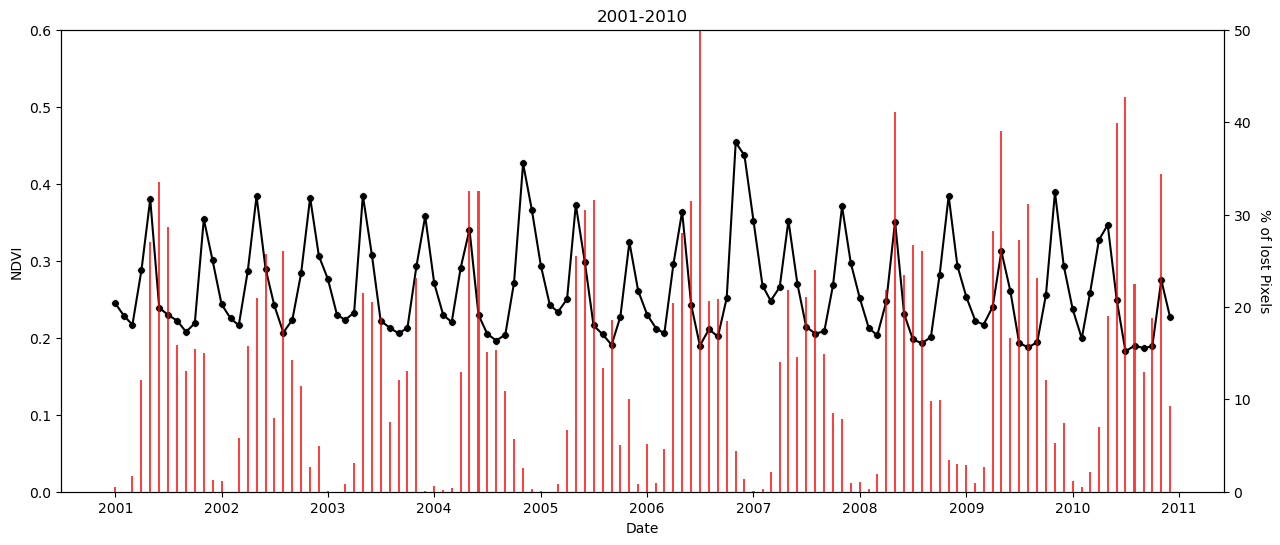

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the time series on the left axis
ax1.plot(df['date'][120:240], df['NDVI'][120:240], color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI')
#ax1.tick_params('y', colors='blue')
min_ndvi = 0
max_ndvi = 0.6
ax1.set_ylim(min_ndvi, max_ndvi)


sns.scatterplot(
        x=df['date'][120:240],
        y=df['NDVI'][120:240],
        ax=ax1,
        color= 'black' ,
        s=30  # Adjust the size of the points as needed
    )






# Create a second y-axis on the right side for the bar plot
ax2 = ax1.twinx()
ax2.bar(df['date'][120:240], df['pixels'][120:240], color='red', alpha=0.75, label='Pixels',width=7)
ax2.set_ylabel('% of lost Pixels',  rotation=270, va='bottom')
ax2.tick_params('y')
#ax2.axhline(y=19486, linestyle='--', color='red', label='75% of total pixels')
min_nan = 0
max_nan = 50
ax2.set_ylim(min_nan, max_nan)






# Set a common title
plt.title('2001-2010')

# # Display the legend
# fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
# Save the plot as a PNG file
plt.savefig('2001-2010.png')

# Show the plot
plt.show()


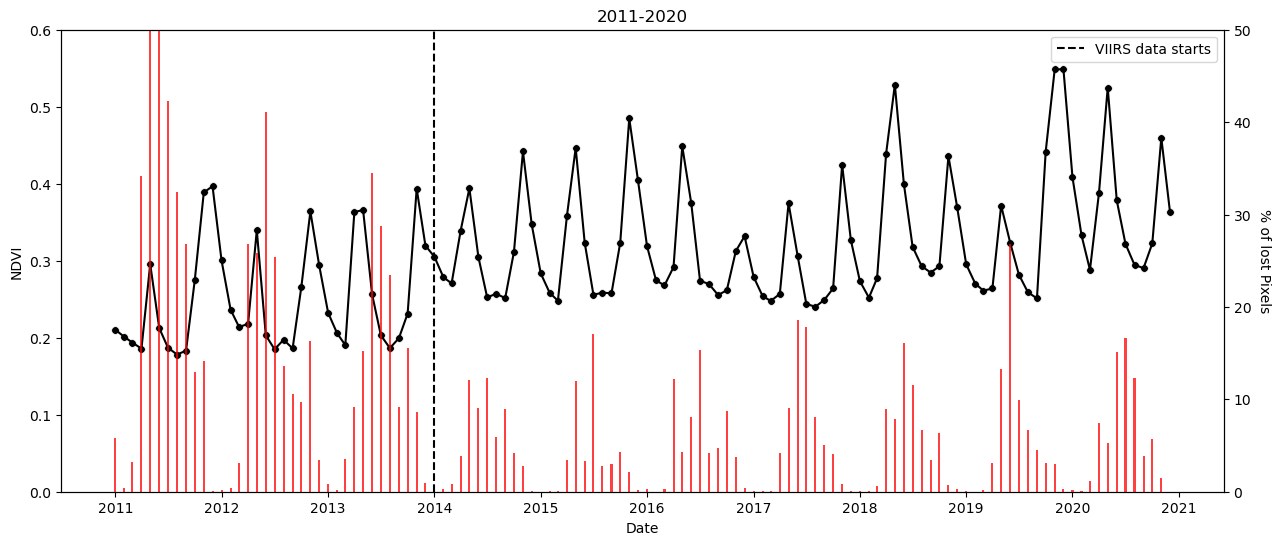

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the time series on the left axis
ax1.plot(df['date'][240:360], df['NDVI'][240:360], color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('NDVI')
#ax1.tick_params('y', colors='blue')
min_ndvi = 0
max_ndvi = 0.6
ax1.set_ylim(min_ndvi, max_ndvi)


sns.scatterplot(
        x=df['date'][240:360],
        y=df['NDVI'][240:360],
        ax=ax1,
        color= 'black' ,
        s=30  # Adjust the size of the points as needed
    )






# Create a second y-axis on the right side for the bar plot
ax2 = ax1.twinx()
ax2.bar(df['date'][240:360], df['pixels'][240:360], color='red', alpha=0.75, width=7)
ax2.set_ylabel('% of lost Pixels',  rotation=270, va='bottom')
ax2.tick_params('y')
#ax2.axhline(y=19486, linestyle='--', color='red', label='75% of total pixels')
min_nan = 0
max_nan = 50
ax2.set_ylim(min_nan, max_nan)


ax2.axvline(x=df['date'][276], linestyle='--', color='black', label='VIIRS data starts')

# Display the legend
ax2.legend()


# Set a common title
plt.title('2011-2020')

# # Display the legend
# fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
# Save the plot as a PNG file
plt.savefig('2011-2020.png')

# Show the plot
plt.show()


In [53]:
df = df.dropna()
df

date     NDVI     pixels
0   1991-01-01  0.24485   0.696824
1   1991-02-01  0.21640   0.115496
2   1991-03-01  0.22425   1.216554
3   1991-04-01  0.30040   7.684312
4   1991-05-01  0.33670  24.188643
..         ...      ...        ...
355 2020-08-01  0.29455  12.284889
356 2020-09-01  0.29040   3.869105
357 2020-10-01  0.32240   5.666987
358 2020-11-01  0.45970   1.447546
359 2020-12-01  0.36270   0.019249

[357 rows x 3 columns]

In [54]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Assuming df is your DataFrame with two variables 'x' and 'y'
# Replace 'x' and 'y' with the actual column names in your DataFrame
x = df['pixels']
y = df['NDVI']

# Calculate the correlation coefficient
corr_coefficient, _ = pearsonr(x, y)
print(f"Correlation Coefficient: {corr_coefficient}")

# Perform linear regression using numpy
slope, intercept = np.polyfit(x, y, 1)
print(f"Linear Equation: y = {slope:.4f} * x + {intercept:.4f}")

# Perform linear regression using statsmodels to get R-squared
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
r_squared = model.rsquared


p_value = model.pvalues[1]  # The p-value for the coefficient of 'x'
print(f"p-value: {p_value}")


print(f"R-squared: {r_squared}")

Correlation Coefficient: -0.21455901953195317
Linear Equation: y = -0.0012 * x + 0.2929
p-value: 4.3612789507943405e-05
R-squared: 0.04603557476412923


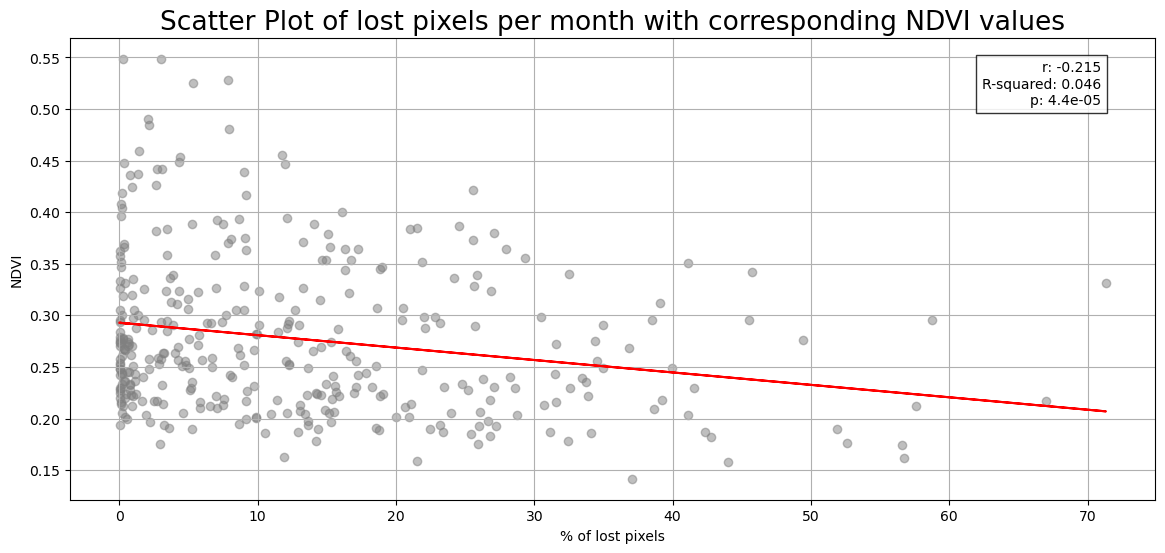

In [55]:
# Plot scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(df['pixels'], df['NDVI'], alpha=0.5, color='grey')
plt.title('Scatter Plot of lost pixels per month with corresponding NDVI values', fontsize=19)
plt.xlabel('% of lost pixels')
plt.ylabel('NDVI')
plt.grid(True)


plt.text(0.95, 0.95, 'r: -0.215\nR-squared: 0.046\np: 4.4e-05', transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Calculate the regression line
slope, intercept = np.polyfit(df['pixels'], df['NDVI'], 1)
regression_line = np.polyval([slope, intercept], df['pixels'])

# Plot the regression line
plt.plot(df['pixels'], regression_line, color='red', label='Regression Line')

# Save the plot as a PNG file
plt.savefig('scatter.png')


plt.show()


In [56]:
ONI = pd.read_excel('ONI_mio.xlsx')
ONI

time  month  poblacion
0   1991-01-01      1        NaN
1   1991-02-01      2        NaN
2   1991-03-01      3   0.347278
3   1991-04-01      4   0.238640
4   1991-05-01      5   0.210527
..         ...    ...        ...
390 2023-07-01      7   0.786147
391 2023-08-01      8   1.072632
392 2023-09-01      9   1.325358
393 2023-10-01     10   1.559457
394 2023-11-01     11   1.779587

[395 rows x 3 columns]

In [57]:
df.dtypes

date      datetime64[ns]
NDVI             float32
pixels           float64
dtype: object

In [58]:
ONI.dtypes

time         datetime64[ns]
month                 int64
poblacion           float64
dtype: object

In [59]:
df.describe()


NDVI      pixels
count  357.000000  357.000000
mean     0.277407   12.844962
std      0.075420   13.438262
min      0.141700    0.015399
25%      0.221900    1.928778
50%      0.260200    9.020212
75%      0.319700   18.829644
max      0.548750   71.330125

In [60]:
ONI.describe()

month   poblacion
count  395.000000  393.000000
mean     6.486076   -0.006165
std      3.449665    0.859438
min      1.000000   -1.647264
25%      3.500000   -0.633876
50%      6.000000   -0.090934
75%      9.000000    0.517760
max     12.000000    2.685853

In [61]:
ONI.rename(columns={'poblacion': 'ONI'}, inplace=True)
ONI.rename(columns={'time': 'date'}, inplace=True)

In [62]:
ONI

date  month       ONI
0   1991-01-01      1       NaN
1   1991-02-01      2       NaN
2   1991-03-01      3  0.347278
3   1991-04-01      4  0.238640
4   1991-05-01      5  0.210527
..         ...    ...       ...
390 2023-07-01      7  0.786147
391 2023-08-01      8  1.072632
392 2023-09-01      9  1.325358
393 2023-10-01     10  1.559457
394 2023-11-01     11  1.779587

[395 rows x 3 columns]

In [63]:

merged_df = pd.merge(df, ONI, on='date')
merged_df

date     NDVI     pixels  month       ONI
0   1991-01-01  0.24485   0.696824      1       NaN
1   1991-02-01  0.21640   0.115496      2       NaN
2   1991-03-01  0.22425   1.216554      3  0.347278
3   1991-04-01  0.30040   7.684312      4  0.238640
4   1991-05-01  0.33670  24.188643      5  0.210527
..         ...      ...        ...    ...       ...
352 2020-08-01  0.29455  12.284889      8 -0.394315
353 2020-09-01  0.29040   3.869105      9 -0.560177
354 2020-10-01  0.32240   5.666987     10 -0.874885
355 2020-11-01  0.45970   1.447546     11 -1.153896
356 2020-12-01  0.36270   0.019249     12 -1.240867

[357 rows x 5 columns]

In [64]:
may_data = merged_df[merged_df['month'] == 12]
filtered_df = may_data[may_data['date'].dt.year < 2014]
filtered_df

date      NDVI    pixels  month       ONI
11  1991-12-01  0.218800  7.538017     12  1.259305
23  1992-12-01  0.316350  4.943215     12 -0.226018
35  1993-12-01  0.274450  0.642926     12  0.093227
56  1995-12-01  0.281100  5.774783     12 -0.952004
68  1996-12-01  0.285400  2.340712     12 -0.481669
80  1997-12-01  0.490700  2.055823     12  2.366015
92  1998-12-01  0.305700  1.058710     12 -1.513604
104 1999-12-01  0.325100  1.755534     12 -1.497579
116 2000-12-01  0.295225  1.751684     12 -0.779460
128 2001-12-01  0.300500  1.320500     12 -0.286462
140 2002-12-01  0.306200  4.997113     12  1.373127
152 2003-12-01  0.357850  0.046198     12  0.417597
164 2004-12-01  0.366200  0.334937     12  0.725117
176 2005-12-01  0.261200  0.866218     12 -0.508263
188 2006-12-01  0.436700  1.370549     12  0.962655
200 2007-12-01  0.297100  0.977863     12 -1.480811
212 2008-12-01  0.293400  3.037536     12 -0.536464
224 2009-12-01  0.293600  7.453321     12  1.375575
236 2010-12-01  0.226800  9.258903     12 -1.624474
248 2011-12-01  0.396750  0.084697     12 -1.073454
260 2012-12-01  0.294475  3.468720     12  0.070121
272 2013-12-01  0.319700  0.927815     12 -0.149038

In [65]:

# Assuming df is your DataFrame with two variables 'x' and 'y'
# Replace 'x' and 'y' with the actual column names in your DataFrame
x = filtered_df['ONI']
y = filtered_df['pixels']

# Calculate the correlation coefficient
corr_coefficient, _ = pearsonr(x, y)
print(f"Correlation Coefficient: {corr_coefficient}")

# Perform linear regression using numpy
slope, intercept = np.polyfit(x, y, 1)
print(f"Linear Equation: y = {slope:.4f} * x + {intercept:.4f}")

# Perform linear regression using statsmodels to get R-squared
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
r_squared = model.rsquared


p_value = model.pvalues[1]  # The p-value for the coefficient of 'x'
print(f"p-value: {p_value}")


print(f"R-squared: {r_squared}")

Correlation Coefficient: 0.1262326772871033
Linear Equation: y = 0.3085 * x + 2.8530
p-value: 0.575636441156274
R-squared: 0.015934688815070208


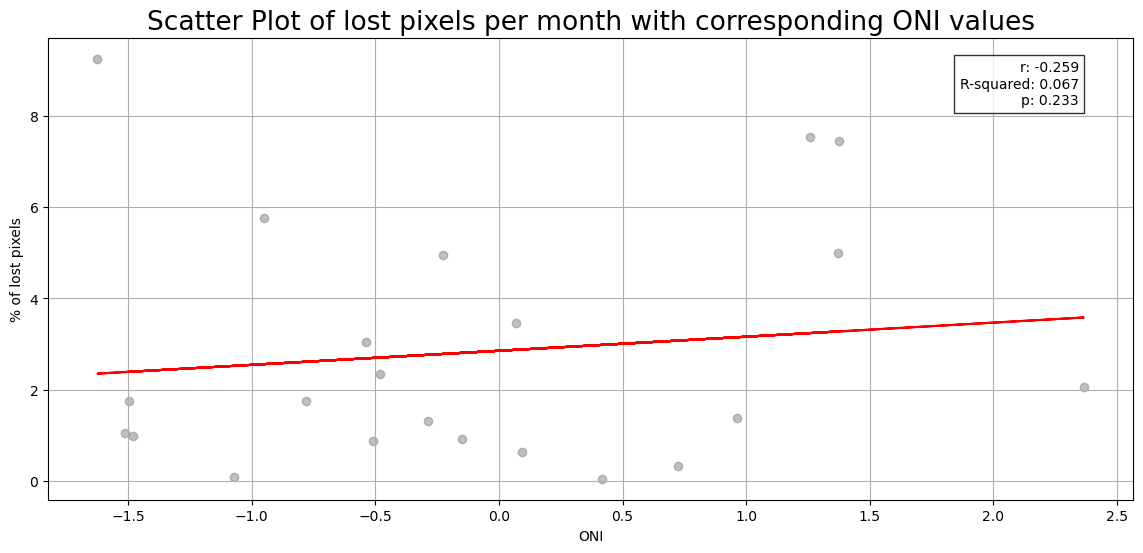

In [66]:
# Plot scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(filtered_df['ONI'], filtered_df['pixels'], alpha=0.5, color='grey')
plt.title('Scatter Plot of lost pixels per month with corresponding ONI values', fontsize=19)
plt.xlabel('ONI')
plt.ylabel('% of lost pixels')
plt.grid(True)


plt.text(0.95, 0.95, 'r: -0.259\nR-squared: 0.067\np: 0.233', transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Calculate the regression line
slope, intercept = np.polyfit(filtered_df['ONI'], filtered_df['pixels'], 1)
regression_line = np.polyval([slope, intercept], filtered_df['ONI'])

# Plot the regression line
plt.plot(filtered_df['ONI'], regression_line, color='red', label='Regression Line')

# Save the plot as a PNG file
plt.savefig('scatter.png')


plt.show()
